In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from scipy.integrate import odeint
from scipy.special import lambertw
sns.set_style('ticks')

In [2]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def cases(beta,gamma,eps,I0):
    R0 = beta/gamma 
    alpha = (1/R0) + eps + I0
    beta2 = np.log((1/R0) + eps)
    gamma = R0
    C = (1/gamma)*(lambertw(-gamma*np.exp(beta2 - alpha*gamma)) + (alpha*gamma))
    return np.real(C)

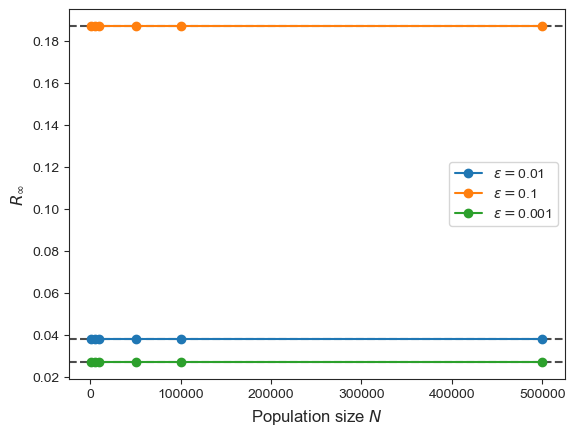

In [9]:
beta = 3
gamma = 1
eps_vec = [0.01,0.1,0.001]
N_vec = [1000,5000,10000,50000,100000,500000]
I0 = 0.001
t = np.linspace(0,200,10000)
fsize_vec = []
ftime_vec = []
for eps in eps_vec:
    R0 = 1 - (1/(beta/gamma)) - eps - I0
    fsize_loop_vec = []
    ftime_loop_vec = []
    for N in N_vec:
        y0 = np.array((1 - I0 - R0,I0,R0))*N
        ret = odeint(deriv, y0, t, args=(N, beta, gamma))
        Rfinal = ret[-1,2] - ret[0,2]
        fsize_loop_vec.append(Rfinal)
    fsize_vec.append(fsize_loop_vec)
    ftime_vec.append(t[np.where(ret[:,1] < 1)][0])
    plt.axhline(cases(beta,gamma,eps,I0),color = 'k', linestyle = '--', alpha = 0.7)
    plt.plot(N_vec,np.array(fsize_loop_vec)/N_vec,'-o', label = r'$\epsilon = $'+str(eps))
    plt.xlabel(r'Population size $N$', fontsize = 12)
    plt.ylabel(r'$R_{\infty}$', fontsize = 12)
    plt.legend()

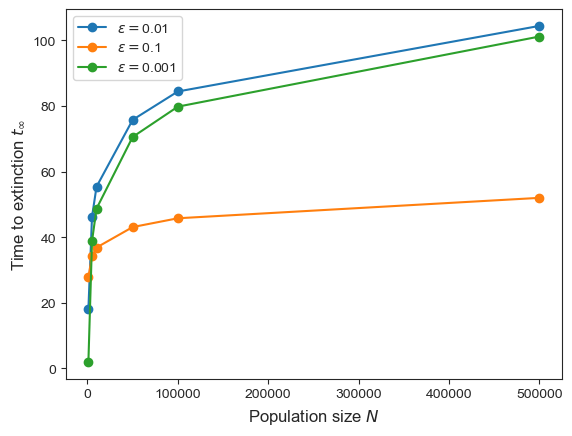

In [5]:
beta = 3
gamma = 1
eps_vec = [0.01,0.1,0.001]
N_vec = [1000,5000,10000,50000,100000,500000]
I0 = 0.001
t = np.linspace(0,200,10000)
fsize_vec = []
ftime_vec = []
for eps in eps_vec:
    R0 = 1 - (1/(beta/gamma)) - eps - I0
    fsize_loop_vec = []
    ftime_loop_vec = []
    for N in N_vec:
        y0 = np.array((1 - I0 - R0,I0,R0))*N
        ret = odeint(deriv, y0, t, args=(N, beta, gamma))
        Rfinal = ret[-1,2] - ret[0,2]
        fsize_loop_vec.append(Rfinal)
        ftime_loop_vec.append(t[np.where(ret[:,1] < 1)][0])
    fsize_vec.append(fsize_loop_vec)
    ftime_vec.append(t[np.where(ret[:,1] < 1)][0])
    plt.plot(N_vec,np.array(ftime_loop_vec),'-o', label = r'$\epsilon = $'+str(eps))
    plt.xlabel(r'Population size $N$', fontsize = 12)
    plt.ylabel(r'Time to extinction $t_{\infty}$', fontsize = 12)
    plt.legend()

In [10]:
def cases(beta,gamma,eps,I0):
    R0 = beta/gamma 
    alpha = (1/R0) + eps + I0
    beta2 = np.log((1/R0) + eps)
    gamma = R0
    C = (1/gamma)*(lambertw(-gamma*np.exp(beta2 - alpha*gamma)) + (alpha*gamma))
    return np.real(C)

print(cases(beta,gamma,0.01,0.001))
print(cases(beta,gamma,0.1,0.001))
print(cases(beta,gamma,0.001,0.001))

0.03789403634656348
0.18721982423082778
0.027175901120676877
